## 第二讲 复杂网络的统计特征二

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### 富人俱乐部系数

In [5]:
G = nx.barabasi_albert_graph(100, 3)
nx.rich_club_coefficient(G, normalized=True)

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 0.9770114942528735,
 4: 0.9739130434782608,
 5: 0.955223880597015,
 6: 0.9655172413793104,
 7: 0.9782608695652175,
 8: 0.9459459459459458,
 9: 0.9696969696969698,
 10: 1.1818181818181817,
 11: 1.0625,
 12: 1.0625,
 13: 1.0625,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0}

[[5, 7, 8], [4, 6, 7], [5, 2, 1, 3, 4, 7]]


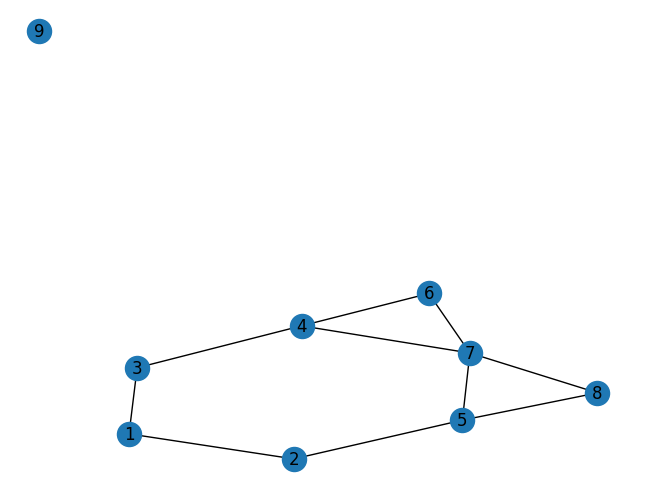

In [11]:
# 路径和循环(圈)
G = nx.Graph([(1, 2), (1, 3), (2, 5), (3, 4), (4, 6), (4, 7), (5, 7), (5, 8), (6, 7), (7, 8)])
G.add_nodes_from(list(range(1, 10)))
nx.draw(G, with_labels=True)
print(nx.cycle_basis(G))

#### 加权网络的静态特征

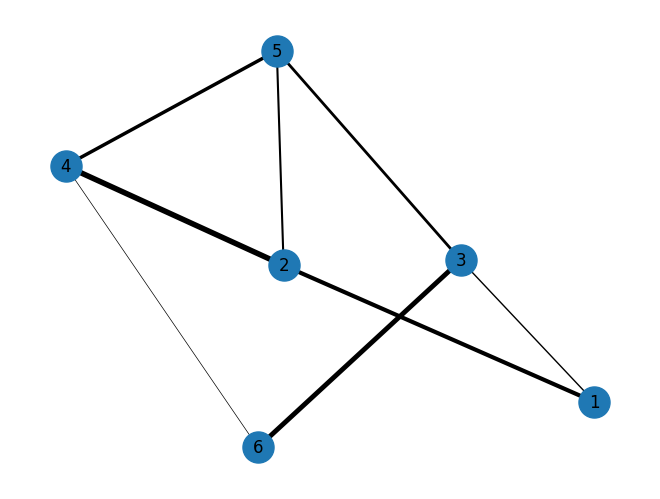

In [12]:
# 创建一个无向的加权网络
WG = nx.Graph()
WG.add_nodes_from([1,2,3,4,5,6])
WG.add_weighted_edges_from([(1,2,3),(1,3,1),(2,4,4),(2,5,1.5),(3,5,2),(3,6,3.5),(4,5,2.5),(4,6,0.5)])
w = [WG[e[0]][e[1]]['weight'] for e in WG.edges()]
nx.draw(WG, node_size=500, width=w, with_labels=True)

In [13]:
# 获取网络节点的加权度（点权）
nx.degree(WG, weight='weight')

DegreeView({1: 4, 2: 8.5, 3: 6.5, 4: 7.0, 5: 6.0, 6: 4.0})

In [21]:
# 获取每一条边的权重
for e in WG.edges():
    # print(e) # (1, 2) 节点 1 到节点 2 的连边
    # print(WG[e[0]][e[1]]) # {'weight': 3}   --->   (1, 2)对应的权重
    print(e, WG[e[0]][e[1]]['weight'])

(1, 2) 3
(1, 3) 1
(2, 4) 4
(2, 5) 1.5
(3, 5) 2
(3, 6) 3.5
(4, 5) 2.5
(4, 6) 0.5


In [19]:
# 无权集聚系数
nx.clustering(WG)

{1: 0,
 2: 0.3333333333333333,
 3: 0,
 4: 0.3333333333333333,
 5: 0.3333333333333333,
 6: 0}

#### 加权集聚系数


加权集聚系数的计算公式可以描述为：


$$C_i^w = \frac{1}{s_i(k_i - 1)} \sum_{j,h} \frac{(w_{ij} + w_{ih})}{2} a_{ij}a_{jh}a_{ih}$$

其中：

- $C_i^w$  是节点  $i$  的加权集聚系数
- $s_i$  是节点  $i$  的邻居权重和
- $k_i$  是节点  $i$  的度 $w_{ij}$  是边  $(i, j)$  的权重
- $a_{ij}$  是邻接矩阵中的一个值，若  $i$  和  $j$  之间有边，则  $a_{ij} = 1$ ，否则为 $0$


In [20]:
nx.clustering(WG, weight='weight')

{1: 0,
 2: 0.20551767286087252,
 3: 0,
 4: 0.20551767286087252,
 5: 0.20551767286087252,
 6: 0}

#### 几种常用的中心性指标

In [22]:
# 分别生成 ER 和 BA 无标度网络，节点数设定为 N = 100
GER = nx.erdos_renyi_graph(100, 0.08)
GBA = nx.barabasi_albert_graph(100, 4)

#### 度中心性

**解释：度中心性反映了一个节点在网络中的直接联系数目。度数越高，节点的中心性越强，它可以直接影响更多的节点。**

定义：对于一个节点 $i$，度中心性 $C_D(i)$ 定义为：
$$C_D(i) = \frac{d_i}{N - 1}$$


其中：
- $d_i$  是节点 $i$ 的度数，即与节点 $i$ 直接相连的边的数量。
- $N$  是图中总的节点数。




#### 介数中心性

**解释：介数中心性高的节点在网络中起到“中介”或“桥梁”的作用，它们位于许多最短路径上，因此在网络信息的传播中具有重要地位。**

定义：对于一个节点 $i$，介数中心性 $C_B(i)$ 定义为：


$$C_B(i) = \sum_{s \neq i \neq t} \frac{\sigma_{st}(i)}{\sigma_{st}}$$


其中：
- $\sigma_{st}$  是从节点 $s$ 到节点 $t$ 的最短路径总数。
- $\sigma_{st}(i)$  是从节点 $s$ 到节点 $t$ 的最短路径中通过节点 $i$ 的路径数。




#### 接近度中心性

**解释：接近度中心性高的节点能够更快地到达网络中的所有其他节点。它们在网络中具有较短的平均最短路径距离，因此具有较高的“可达性”。**

定义：对于一个节点 $i$，接近度中心性 $C_C(i)$ 定义为：


$$C_C(i) = \frac{N - 1}{\sum_{j} d(i, j)}$$


其中：
- $d(i, j)$  是节点 $i$ 到节点 $j$ 之间的最短路径距离。
- $N$  是图中的总节点数。

    
#### 特征向量中心性

**解释：特征向量中心性高的节点不仅与许多其他节点相连，而且这些相连节点本身也具有较高的中心性。它反映了节点在整个网络中的影响力，是一种全局中心性度量。**

定义：对于一个节点 $i$，特征向量中心性 $x_i$ 定义为：


$$x_i = \frac{1}{\lambda} \sum_{j} A_{ij} x_j$$


其中：
- $A_{ij}$  是邻接矩阵的元素，表示节点 $i$ 和 $j$ 之间是否有连接（有连接则为$1$，否则为$0$）。
- $\lambda$  是对应的特征值。
- $x_j$  是节点 $j$ 的特征向量中心性。


In [24]:
# 度中心性
dc1 = nx.degree_centrality(GER)
dc2 = nx.degree_centrality(GBA)

# 介数中心性
bc1 = nx.betweenness_centrality(GER)
bc2 = nx.betweenness_centrality(GBA)

# 接近度中心性
cc1 = nx.closeness_centrality(GER)
cc2 = nx.closeness_centrality(GBA)

# 特征向量中心性
ec1 = nx.eigenvector_centrality(GER)
ec2 = nx.eigenvector_centrality(GBA)

Text(0.5, 1.0, 'eigenvector_centrality')

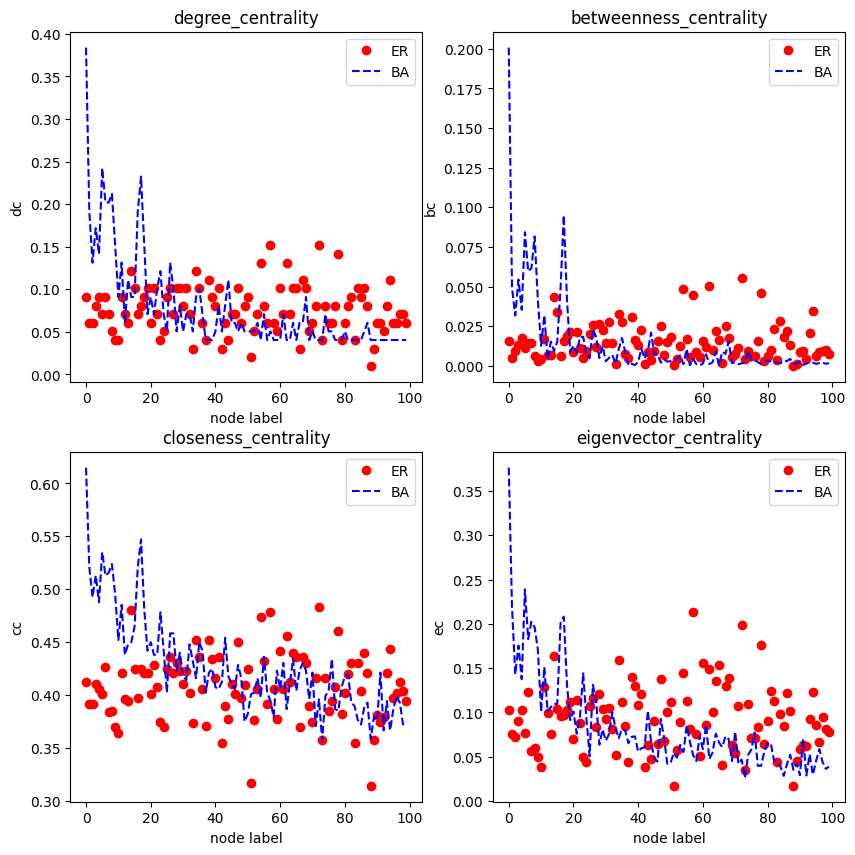

In [28]:
# 绘图比较
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(dc1.keys(), dc1.values(), 'ro', label='ER')
plt.plot(dc2.keys(), dc2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("dc")
plt.title("degree_centrality")

plt.subplot(222)
plt.plot(bc1.keys(), bc1.values(), 'ro', label='ER')
plt.plot(bc2.keys(), bc2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("bc")
plt.title("betweenness_centrality")

plt.subplot(223)
plt.plot(cc1.keys(), cc1.values(), 'ro', label='ER')
plt.plot(cc2.keys(), cc2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("cc")
plt.title("closeness_centrality")

plt.subplot(224)
plt.plot(ec1.keys(), ec1.values(), 'ro', label='ER')
plt.plot(ec2.keys(), ec2.values(), 'b--', label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("ec")
plt.title("eigenvector_centrality")

#### 度-度相关性

#### 1. 基于最近邻平均度值的度-度相关性


In [30]:
# 加载三个真实数据集
# 1. 科学合作网络
df1 = pd.read_excel("citation.xlsx")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using=nx.Graph())
# 2. 电网
df2 = pd.read_excel('power.xlsx')
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using=nx.Graph())
# 3. 代谢网络
df3 = pd.read_excel('celegans_metabolic.xlsx')
G3 = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph())

In [34]:
# 定义求最近邻平均度的函数
def average_nearest_neighbor_degree(G):
    k = set([G.degree(i) for i in G.nodes()])
    sorted_k = sorted(k)
    knni = nx.average_neighbor_degree(G)

    k_nn_k = []
    for ki in sorted_k:
        if ki == 0:
            k_nn_k.append(0.0)
        else:
            c, s = 0, 0
            for i in G.nodes():
                if G.degree(i) == ki:
                    s += knni[i]
                    c += 1
            k_nn_k.append(s/c)

    return sorted_k, k_nn_k

In [35]:
x1, y1 = average_nearest_neighbor_degree(G1)
x2, y2 = average_nearest_neighbor_degree(G2)
x3, y3 = average_nearest_neighbor_degree(G3)

#### 2. 基于Pearson相关系数的度-度相关性

In [36]:
r1 = nx.degree_assortativity_coefficient(G1)
r2 = nx.degree_assortativity_coefficient(G2)
r3 = nx.degree_assortativity_coefficient(G3)

print(r1)
print(r2)
print(r3)

0.13506886900042142
0.0034569877442048825
-0.219662309363656
